In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model;
from sklearn.model_selection import train_test_split
%matplotlib inline

In [222]:
dataset = pd.read_csv("D:\\Cognitive Application Workshop\\salary_data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


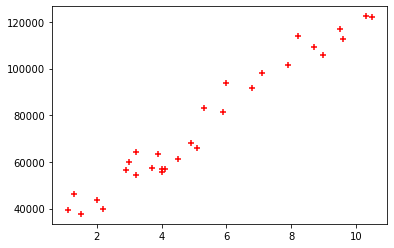

In [223]:
plt.scatter(dataset[["YearsExperience"]],dataset[["Salary"]], color='red', marker='+')

In [224]:
Years = dataset[["YearsExperience"]]
salary = dataset[["Salary"]]
X_train, X_test, Y_train, Y_test = train_test_split(Years, salary, 
                                                    train_size=0.8, 
                                                    random_state=30)
X_train = X_train.to_numpy().T
Y_train = Y_train.to_numpy().T
X_test = X_test.to_numpy().T
Y_test = Y_test.to_numpy().T
Y_train

array([[ 64445,  60150, 105582,  39891,  55794, 101302,  81363,  93940,
         46205,  66029,  54445,  57189,  43525,  61111,  83088,  98273,
         37731, 113812,  56957,  91738, 112635,  57081, 121872,  56642]],
      dtype=int64)

In [225]:
Y_train.shape

(1, 24)

In [226]:
def relu(Z):
    x = np.maximum(0,Z)
    return x

def drelu(Z):
    Z[Z<=0] = 0
    Z[Z>0] = 1
    return Z

In [227]:
def model(X, Y, learning_rate, iterations):
    m = Y.shape[1]
    W = 5000 + 5000*np.random.randn(1,1)
    b = np.zeros((1,1))
    costs = []
    for i in range(0, iterations):
        Z = np.dot(W,X)+b
        A = relu(Z)
        
        cost = 1/(2*m)*np.sum(np.multiply(A-Y,A-Y))
        np.squeeze(cost)
        costs.append(cost)
        
        dA = 1/m*(A-Y)
        dZ = np.multiply(drelu(Z),dA)
        dW = np.dot(dZ, X.T)
        db = np.sum(dZ, axis=1, keepdims = True)
        
        W = W - learning_rate*dW
        b = b - learning_rate*db
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return W,b

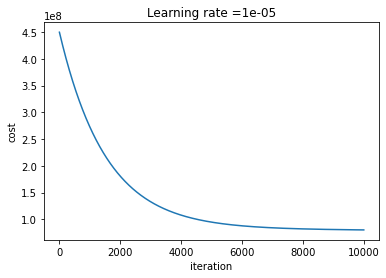

In [243]:
W,b = model(X_train, Y_train, learning_rate = 0.00001, iterations = 10000)

In [244]:
train_predictions = np.dot(W, X_train)+b

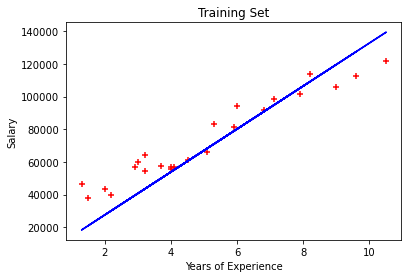

In [245]:
plt.scatter(X_train, Y_train, color = 'red',marker = '+')
plt.plot(X_train.T, train_predictions.T, color='blue')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.title("Training Set")
plt.show()

In [246]:
test_predictions = np.dot(W, X_test)+b

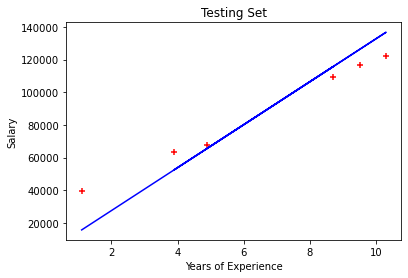

In [247]:
plt.scatter(X_test, Y_test, color = 'red',marker = '+')
plt.plot(X_test.T, test_predictions.T, color='blue')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.title("Testing Set")
plt.show()